# Data Mining & Analytics
## Lab 6 (A): Skip Gram models

Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_

This assignment  will be broadly  split into **2 parts**.


https://colab.research.google.com/drive/1c_UJdi2CfntqWLDQR9TXuLfsZq8eHqJJ

In [9]:
!pip install gensim
!wget -nd https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
  
from __future__ import division
from sklearn.cluster import KMeans
from numbers import Number
from pandas import DataFrame
import sys, codecs, numpy

--2019-03-28 02:52:59--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.0.198
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.0.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  96.3MB/s    in 18s     

2019-03-28 02:53:17 (89.4 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [0]:
import re
import nltk

from gensim.models import word2vec
from gensim.models import KeyedVectors

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import pandas as pd
import numpy as np 
import gensim

from collections import Counter
from math import sqrt

pd.options.mode.chained_assignment = None 

Q1: Find the **cosine similarities** between the following word pairs/tuples:
- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)

We could use the google library for this but for the sake of learning, I will be computing it manually. We first define our word pairs:

In [0]:
word_pairs = [
              ('France', 'England') ,
              ('smaller', 'bigger'), 
              ('England', 'London'), 
              ('France', 'Rocket'), 
              ('big', 'bigger')
            ]

Now we define the word2vec function which counts the characters in the word, precomputes a set of the different characters and also computes the length of the word vector. It returns a tuple. Another function is defined for calculating the cosine similarity between two vectors.

In [0]:
def word2vec(word):
    # count the characters in word
    cw = Counter(word)
    #print(cw)
    # precomputes a set of the different characters
    sw = set(cw)
    #print(sw)
    # precomputes the "length" of the word vector
    lw = sqrt(sum(c*c for c in cw.values()))
    #print(lw)

    # return a tuple
    return cw, sw, lw

def cosdis(v1, v2):
    # which characters are common to the two words?
    common = v1[1].intersection(v2[1])
    # by definition of cosine distance we have
    return sum(v1[0][ch]*v2[0][ch] for ch in common)/v1[2]/v2[2]

In [6]:
for pair in word_pairs:
    va = word2vec(pair[0])
    vb = word2vec(pair[1])
    print('For the pair {} the cosine similarity is {}.'.format(pair, cosdis(va, vb)))

For the pair ('France', 'England') the cosine similarity is 0.4082482904638631.
For the pair ('smaller', 'bigger') the cosine similarity is 0.2357022603955158.
For the pair ('England', 'London') the cosine similarity is 0.5270462766947299.
For the pair ('France', 'Rocket') the cosine similarity is 0.3333333333333334.
For the pair ('big', 'bigger') the cosine similarity is 0.816496580927726.


**ANS: SEE RESULT FROM CELL ABOVE**

Q2 : Write an expression to extract the vector representations of the words (France, England, smaller, bigger, rocket, big).

Using the google trained model to extract the vector representation from the model.

In [0]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [11]:
word_vectors = model.wv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [12]:
goognews_wor = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True, limit=10000)
word_vectorsg = goognews_wor.wv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


THIS IS THE ANSWER: After loading the model we index it with our words using the following function: 

In [13]:
# ANSWER FOR QUESTION 2
words = ['France', 'England', 'smaller', 'bigger', 'rocket', 'big']
for word in words:
    print(len(model[word]), model[word])

300 [ 4.85839844e-02  7.86132812e-02  3.24218750e-01  3.49121094e-02
  7.71484375e-02  3.54003906e-02 -1.25976562e-01 -3.86718750e-01
 -1.31835938e-01  2.91748047e-02 -1.44531250e-01 -1.42578125e-01
  1.79687500e-01 -2.75390625e-01 -1.65039062e-01  9.32617188e-02
  1.17187500e-01  1.82617188e-01  6.10351562e-02  1.14257812e-01
  1.82617188e-01 -1.16699219e-01 -3.24707031e-02 -7.56835938e-02
  9.64355469e-03  8.59375000e-02 -2.85156250e-01 -2.55859375e-01
  3.01513672e-02  2.16796875e-01 -1.00097656e-01  2.85644531e-02
 -2.81250000e-01 -8.39843750e-02 -2.02636719e-02 -1.96289062e-01
 -4.78515625e-02  7.12890625e-02 -1.42578125e-01 -1.13525391e-02
  1.16210938e-01  7.22656250e-02  1.47460938e-01  1.50390625e-01
  1.40625000e-01  2.47070312e-01 -1.69921875e-01  7.76367188e-02
 -5.44433594e-02  1.66992188e-01 -1.45507812e-01  2.12402344e-02
 -7.51953125e-02  4.58984375e-02 -2.55859375e-01  1.49414062e-01
 -5.62500000e-01 -1.34765625e-01 -1.87500000e-01 -3.26538086e-03
  8.44726562e-02  1.3

If we wanted to get the vector representation of those words using only a pair of words we could do the following (for which I only make one example since the answer is the one above

In [14]:
A = 'big'
B = 'bigger'

wordsA = list(A) #A.lower().split()
wordsB = list(B) #B.lower().split()

vocab = wordsA + wordsB

vA = np.zeros(len(vocab), dtype=float)
vB = np.zeros(len(vocab), dtype=float)

for w in wordsA:
    i = vocab.index(w)
    vA[i] += 1

print('The vector representation of word A is {}'.format(vA))
    
for w in wordsB:
    i = vocab.index(w)
    vB[i] += 1

print('The vector representation of word B is {}'.format(vB))

The vector representation of word A is [1. 1. 1. 0. 0. 0. 0. 0. 0.]
The vector representation of word B is [1. 1. 2. 0. 0. 0. 0. 1. 1.]


**ANS: SEE THREE CELL ABOVE**

Q3: Repeat the exercise from Q1 by finding the euclidean distances between the word pairs.

The eculideand distance is "the "ordinary" (i.e. straight-line) distance between two points in Euclidean space". In other words, the euclidean distance is given by:

$$ Euclidean \space Distance = \sqrt{(v1 - v2)^2} $$

In [15]:
#YOUR CODE HERE
for pair in word_pairs:
    print('For the pair {} the euclidean distance is {}.'.format(pair, np.linalg.norm(model[pair[0]]-model[pair[1]])))

For the pair ('France', 'England') the euclidean distance is 3.015106678009033.
For the pair ('smaller', 'bigger') the euclidean distance is 1.8618743419647217.
For the pair ('England', 'London') the euclidean distance is 2.875283718109131.
For the pair ('France', 'Rocket') the euclidean distance is 3.892071008682251.
For the pair ('big', 'bigger') the euclidean distance is 1.9586496353149414.


**ANS: SEE CELL ABOVE**

Q4: What is the relationship between the magnitude of individual vectors, the vectors themselves and the cosine distance for any pair of words. Use any tuple in Q1 as an example to support your answer.

The magnitude of an individual vector is given by:

$$ Vector \space \lvert \lvert (a,b,...,n) \rvert \rvert = \sqrt{a^2 + b^2 + ... + n^2} $$

The cosine similarity though is a measurement of orientation and NOT magnitude. When calculating the cosine similarity between two vectors (two words, two sentences, or two documents), we take into consideration the magnitude's direction to be able to calculate the angle between vectors as seen in the following image:

<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/10/3d_projection.png" width=300, height=300>

Let's use the vector representation of the words big and bigger calculated before:

In [16]:
#Converting to DataFrames
va_df = pd.DataFrame(vA) 
vb_df = pd.DataFrame(vB)

#Magnitude Calculation
va_df = va_df**2
vb_df = vb_df**2

mag_big = va_df.sum()
mag_bigger = vb_df.sum()

print('The vector representations for big is {} and for bigger is {}.'.format(vA,vB))
print('The magnitude for big is {} and for bigger is {}.'.format(mag_big[0], mag_bigger[0]))
print('The cosines similarity between these two vectors is {}.'.format(
    np.dot(vA, vB) / (np.linalg.norm(vA) * np.linalg.norm(vB))))

The vector representations for big is [1. 1. 1. 0. 0. 0. 0. 0. 0.] and for bigger is [1. 1. 2. 0. 0. 0. 0. 1. 1.].
The magnitude for big is 3.0 and for bigger is 8.0.
The cosines similarity between these two vectors is 0.8164965809277259.


To verify that the cosine similarity is independent of the magnitude we can multiple each vector times 2 and we will see that the similarity is unchanged:

In [17]:
print('The cosines similarity between these two vectors is {}, therefore unchanged.'.format(
    np.dot(vA*2, vB*2) / (np.linalg.norm(vA*2) * np.linalg.norm(vB*2))))

The cosines similarity between these two vectors is 0.8164965809277259, therefore unchanged.


**ANS: SEE ALL ABOVE**

Q5: Time to dabble with the power of Word2Vec. Find the 2 closest words  for the following conditions:  
- (King - Queen)
- (bigger - big + small)
- (man + programmer - woman)
- (school + shooting - guns)
- (Texas + Milwaukee – Wisconsin)

In [18]:
king_queen = model['King'] - model['Queen']
print('The two closest words for [King - Queen] and their similarities are {}'.format(model.most_similar(positive=[king_queen], topn=2)))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


The two closest words for [King - Queen] and their similarities are [('L._Marcellino', 0.3117591142654419), ('M._Levin_D-Mich.', 0.31119126081466675)]


In [19]:
bigger_big_small = model['bigger'] - model['big'] + model['small']
print('The two closest words for [bigger - big + small] and their similarities are {}'.format(model.most_similar(positive=[bigger_big_small], topn=2)))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


The two closest words for [bigger - big + small] and their similarities are [('larger', 0.7870662808418274), ('smaller', 0.768511176109314)]


In [20]:
man_prog_wom = model['man'] + model['programmer'] - model['women']
print('The two closest words for [man - programmer - woman] and their similarities are {}'.format(model.most_similar(positive=[man_prog_wom], topn=2)))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


The two closest words for [man - programmer - woman] and their similarities are [('programmer', 0.7885046005249023), ('computer_programmer', 0.5461097955703735)]


In [21]:
sch_sho_gun = model['school'] + model['shooting'] - model['guns']
print('The two closest words for [school + shooting - guns] and their similarities are {}'.format(model.most_similar(positive=[sch_sho_gun], topn=2)))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


The two closest words for [school + shooting - guns] and their similarities are [('school', 0.5944540500640869), ('shooting', 0.5278400182723999)]


In [22]:
tex_mil_wis = model['Texas'] + model['Milwaukee'] - model['Wisconsin']
print('The two closest words for [Texas + Milwaukee - Wisconsin] and their similarities are {}'.format(model.most_similar(positive=[tex_mil_wis], topn=2)))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


The two closest words for [Texas + Milwaukee - Wisconsin] and their similarities are [('Houston', 0.7753652334213257), ('Dallas', 0.717473030090332)]


We could also use the method described in class but the previous method is clearer for learning since we substract and add the vectors manually. This is the alternative method:

In [23]:
#YOUR CODE HERE
model.most_similar(positive=['Texas','Milwaukee'], negative=['Wisconsin'], topn=4)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Houston', 0.7767744064331055),
 ('Fort_Worth', 0.7270511388778687),
 ('Dallas', 0.718908965587616),
 ('San_Antonio', 0.7151918411254883)]

**ANS: SEE ALL CELLS ABOVE**

Q6: Using the vectors for the words in the Google News dataset, explore the semantic representation of these words through K-means clustering and explain your findings.

Do to the size of the vocabulary in the google news model we will limit ourself to only 10,000 points. 

In [0]:
#X = model[model.vocab]
X = goognews_wor[goognews_wor.vocab]

In [25]:
from sklearn import cluster
from sklearn import metrics
 
NUM_CLUSTERS=3

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
# print ("Cluster id labels for inputted data")
# print (labels)
# print ("Centroids data")
# print (centroids)
 
# print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

-86681.164
Silhouette_score: 
0.009403197


In [26]:
for i in range(0,3):
    vec = centroids[i]
    similar = goognews_wor.most_similar(positive=[vec], topn=5)
    print('The 5 closest words to the centroid belonging to cluster {} are {}'.format(i, similar))

The 5 closest words to the centroid belonging to cluster 0 are [('government', 0.5198756456375122), ('governments', 0.4799577593803406), ('lawmakers', 0.46219098567962646), ('economic', 0.4581145644187927), ('companies', 0.4541105031967163)]
The 5 closest words to the centroid belonging to cluster 1 are [('Scott', 0.5137614607810974), ('Brandon', 0.5092521905899048), ('Curtis', 0.5056530237197876), ('Ryan', 0.5053004026412964), ('Morgan', 0.4910361170768738)]
The 5 closest words to the centroid belonging to cluster 2 are [('do', 0.5616439580917358), ('just', 0.5435646772384644), ('even', 0.539854884147644), ('anyway', 0.5265798568725586), ('the', 0.5211422443389893)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Base on the 5 closest points to the cluster centroids seen above. It can be seen that one of the clusters is comprised of names (ex. Scott, Brandon, etc.) the second cluster contains common words like do, just, the, and the last cluster contains words related to the economy and the goverment (ex. government, companies, economic). This results are not in any way representative of the real vocabulary since it's only sampling 10000 words but the framework reamins the same. The results for 3 clusters are still good given the divisions. 

In [0]:
# vec = centroids[1]
# similars = model.most_similar(positive=[vec], topn=5)

# model.most_similar(positive=['Texas','Milwaukee'], negative=['Wisconsin'], topn=4)

Q7: What loss function does the skipgram model use and briefly describe what this function is minimizing .

There are several loss functions that we can incorporate to the skipgram model including the Negative Sampling (NEG), Noise Contrastive Estimation (NCE), and Cross Entropy. Assuming the question asks about cross entropy since it's the loss function that we talked about in class. 

This loss function measures the cross entropy between the predicted probabilities $p$ and the true binary labels $y$. The cross entropy is then given by:

$$ H(p,q) = - \sum_x p(x)\space log \space q(x) $$

The true label $y_i$ is 1 only when $w_i$ is the real output word but 0 when is any other word that is not the real. The loss funciton, when using cross entropy, has a parameter config $\theta$. The overall loss functions aims to minimize the cross entropy between the prediction and the groudn truth (the higher the cross entropy the smaller the similarity between two distributions. The loss function is given by:

$$ L = - \sum_{i=1}^{V} y_i \space log \space p(w_i \lvert w_I) =  -log \space p(w_O \lvert w_I)$$

where:

$$ p(w_O \lvert \rvert w_I) = \frac{exp(v_{w_O}^" \intercal v_{w_I})}{\sum_{i=1}^{V} exp(v_{w_O}^" \intercal v_{w_I})} $$

Everytime we star training a model using back-progapagation with stochastic gradient descent, we compute the gradient of $L$.

# IGNORE AFTER THIS

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [0]:
visual = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True, limit=500)

C:\Users\vicen\Anaconda3\envs\data_mining\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


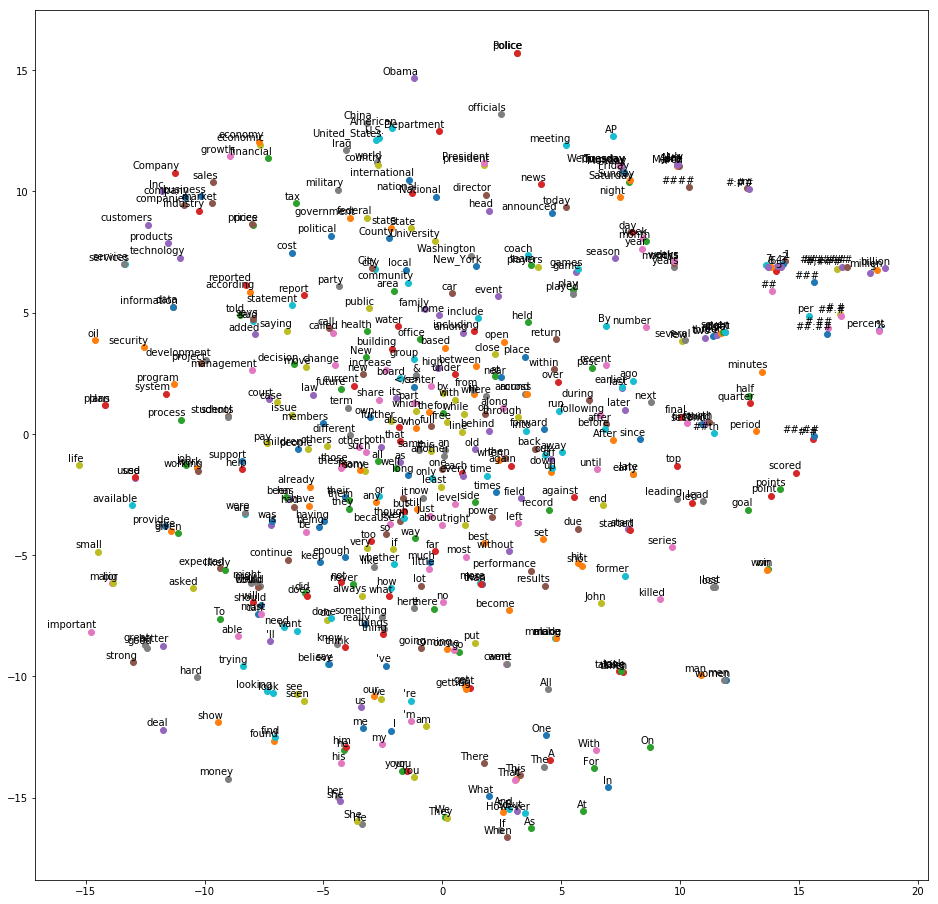

In [0]:
tsne_plot(visual)